# Análisis de componentes de frecuencia de una señal con una Transformada Rápida de Fourier

Ejemplo donde se usará una transformada rápida de fourier para calcular la densidad espectral de una señal.

---

In [25]:
# Importación de dependencias.
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Lectura de dataset.
df0 = pd.read_csv('https://github.com/ipython-books/'
                  'cookbook-2nd-data/blob/master/'
                  'weather.csv?raw=true',
                  na_values=(-9999),
                  parse_dates=['DATE'])
df = df0[df0['DATE'] >= '19940101']
df.head()

,STATION,DATE,PRCP,TMAX,TMIN
365,GHCND:FR013055001,1994-01-01,0.0,104.0,72.0
366,GHCND:FR013055001,1994-01-02,4.0,128.0,49.0
367,GHCND:FR013055001,1994-01-03,0.0,160.0,87.0
368,GHCND:FR013055001,1994-01-04,0.0,118.0,83.0
369,GHCND:FR013055001,1994-01-05,34.0,133.0,55.0


In [27]:
# Se agrupan los registros por fecha y se determina su promedio,
# con la finalidad de solo tener un registro por día.
df_avg = df.dropna().groupby('DATE').mean()
df_avg.head()

,PRCP,TMAX,TMIN
DATE,,,
1994-01-01,178.666667,127.388889,70.333333
1994-01-02,122.000000,152.421053,81.736842
1994-01-03,277.333333,157.666667,95.555556
1994-01-04,177.105263,142.210526,95.684211
1994-01-05,117.944444,130.222222,75.444444


In [28]:
# Se obtienen las listas de fechas y sus temperaturas correspondientes
date = pd.to_datetime(df_avg.index)
#date = df_avg.index.to_datetime()
temp = (df_avg['TMAX'] + df_avg['TMIN']) / 20.
N = len(temp)
print(N)

7282


Text(0, 0.5, 'Mean temperature')

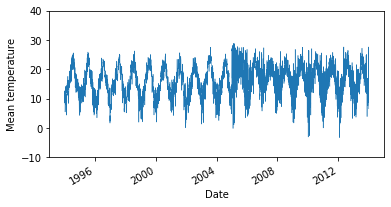

In [29]:
# Visualiza evolución de la temperatura.
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp.plot(ax=ax, lw=.5)
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')

In [44]:
# Aplica transformada de fourier y densidad de espectro de la señal.
temp_fft = sp.fftpack.fft(temp.to_numpy())

In [45]:
# Obtiene el cuadrado del valor absoluto para obtener densidad expectral de potencia (PSD).
temp_psd = np.abs(temp_fft) ** 2

In [46]:
# Obtiene frecuencias correspondientes a los valores de la PSD.
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 365)

In [47]:
# Solo interesan las frecuencias positivas.
i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

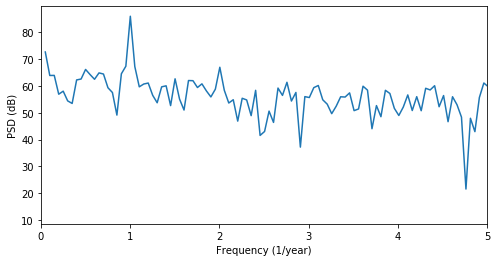

In [48]:
# Grafica la densidad expectral de podencia de la señal, como una función de
# frecuencia.
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [49]:
# Corta frecuencias mayores a la frecuencia fundamental.
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 1.1] = 0

Text(0, 0.5, 'Mean temperature')

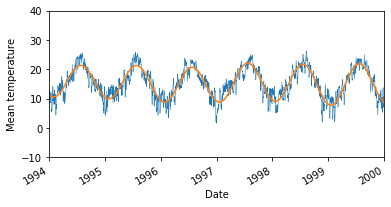

In [50]:
# Aplica una FFT inversa para convertir la transformada de fourier modificada
# nuevamente al dominio temporal. De esta forma, se recupera una señal que
# contiene principalmente la frecuencia fundamental.
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
ax.set_xlim(datetime.date(1994, 1, 1),
            datetime.date(2000, 1, 1))
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')